# Unsupervised Anomaly Detection

We continue with anomaly detection by focusing now on unsupervised anomaly detection. Recall, you can think of an anomaly as some sort of highly unusual event occuring in your data that you wish to find (e.g. an attack on your network, a defective device, credit card fraud). More usefully, a good definition of an anomaly is the following: An anomaly is a data sample that deviates significantly from other data samples, so much so to suggest that it was generated by a different mechanism. In probability language, you can think of an anomaly as something that comes from a different distribution than the "real" data.

Unsupervised anomaly detection deals with the case where we don't know ahead of time which points in our dataset are anomalies. The goal is to figure out what the structure of the data is, and to use that structure to try to determine what the anomalies are. In statistical lingo this is often called _outlier detection_. We're looking for points that look statistically unusual in some way.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(3)

import warnings
warnings.filterwarnings('ignore')

In [104]:
def get_data(size=1000,ratio=0.01):
    num_neg_samples = round(size*(1-ratio))
    num_pos_samples = round(size*ratio)
    neg_samples = np.random.multivariate_normal(np.array([0,0]),.5*np.eye(2),size=num_neg_samples)
    pos_samples = get_pos_samples(num_pos_samples)
    X = np.vstack([neg_samples,pos_samples])
    np.random.shuffle(X)
    return X,neg_samples,pos_samples

def get_pos_samples(n,lim=3):
    # generates anomalies from a mixture distribution of 1 uniform + 3 gaussians with random means and covariances
    x = np.zeros((n,2))
    idx = np.arange(n)
    
    mean = np.random.uniform(-lim,lim,size=2)
    cov = .1*np.random.rand()*np.eye(2)
    for i in idx[:n//3]:
        x[i] = np.random.multivariate_normal(mean,cov,size=1)

    mean = np.random.uniform(-lim,lim,size=2)
    cov = .1*np.random.rand()*np.eye(2)
    for i in idx[n//3:2*n//3]:
        x[i] = np.random.multivariate_normal(mean,cov,size=1)

    mean = np.random.uniform(-lim,lim,size=2)
    cov = .1*np.random.rand()*np.eye(2)
    for i in idx[2*n//3:]:
        x[i] = np.random.multivariate_normal(mean,cov,size=1)

    u = np.zeros((5,2))
    for i in range(5):
        u[i] = np.random.uniform(-lim+2,lim+2,size=2)

    return np.vstack([x,u])

def plot_data(X,x1,x2):    
    f, ax = plt.subplots(figsize=(8, 8))    
    ax.scatter(x1[:,0],x1[:,1],marker='.',c='red',label='y=0')
    ax.scatter(x2[:,0],x2[:,1],marker='.',c='blue',label='y=1')    
    ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
    ax.legend(loc='upper right')

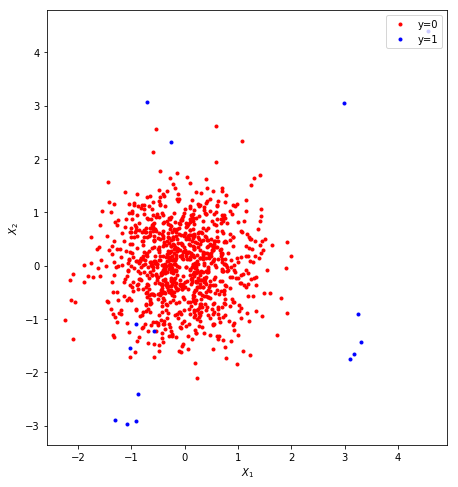

In [105]:
X,neg_samples,pos_samples = get_data()
plot_data(X,neg_samples,pos_samples)